<a href="https://colab.research.google.com/github/siddhusam/Machine_Learning/blob/main/lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Dataset using for the project
dataframe_project = pd.read_csv(r'/content/Malayalam_Char_Gabor.csv')
dataframe_project

,ImageName,Label,Theta0_Lambda1_LocalEnergy,Theta0_Lambda1_MeanAmplitude,Theta0_Lambda0_LocalEnergy,Theta0_Lambda0_MeanAmplitude,Theta0_Lambda0_LocalEnergy.1,Theta0_Lambda0_MeanAmplitude.1,Theta0_Lambda0_LocalEnergy.2,Theta0_Lambda0_MeanAmplitude.2,...,Theta0_Lambda1_LocalEnergy.3,Theta0_Lambda1_MeanAmplitude.3,Theta0_Lambda0_LocalEnergy.12,Theta0_Lambda0_MeanAmplitude.12,Theta0_Lambda0_LocalEnergy.13,Theta0_Lambda0_MeanAmplitude.13,Theta0_Lambda0_LocalEnergy.14,Theta0_Lambda0_MeanAmplitude.14,Theta0_Lambda0_LocalEnergy.15,Theta0_Lambda0_MeanAmplitude.15
0,3453_original_229a (3).png_1204e789-c4bc-488c-...,3453,39752,24995,28698,22220,47492,39752,24995,28698,...,3504689,3487904,3468278,1963883,2072174,3508397,3491984,3469319,1962913,2071265
1,3453_original_970a.png_80bfa285-9714-48c6-9bbb...,3453,63716,40885,44338,34134,80364,63716,40885,44338,...,4916428,4888272,4851933,2748641,2900020,4916784,4888045,4851383,2748266,2899613
2,3453_original_266a.png_4ac656bd-440f-41a2-929f...,3453,74632,62911,69469,55907,73178,74632,62911,69469,...,5481859,5456359,5412212,3056522,3225966,5486808,5462044,5413867,3054577,3224056
3,3453_original_2898a.png_cedc433e-d63c-453e-8df...,3453,75036,64182,77137,72890,69444,75036,64182,77137,...,5181926,5156425,5110574,2885396,3045515,5188801,5164012,5112495,2882887,3043039
4,3453_original_379a.png_bc94ae88-4af1-4375-91ce...,3453,96639,99048,105117,102279,99693,96639,99048,105117,...,6160991,6127856,6062635,3419058,3609077,6164290,6132374,6063669,3417937,3607999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8142,57.png,3337,72964,51154,54224,35308,86407,72964,51154,54224,...,5299603,5266739,5226140,2960955,3123975,5305273,5273262,5227508,2959129,3122212
8143,50.png,3337,72964,51154,54224,35308,86407,72964,51154,54224,...,5299603,5266739,5226140,2960955,3123975,5305273,5273262,5227508,2959129,3122212
8144,81.png,3337,91924,68516,74379,43911,107549,91924,68516,74379,...,5173680,5132048,5086101,2884587,3042920,5186365,5145728,5088521,2880923,3039425
8145,76.png,3337,123488,123131,132974,122304,127872,123488,123131,132974,...,5918863,5876614,5792105,3263922,3445408,5923742,5882949,5794078,3262649,3444197


In [5]:
# Question A1:
# Taking 2 attributes having real values and make a scatter plot out of it

attribute1 = dataframe_project['Theta0_Lambda0_MeanAmplitude'] # Taking column f0 as the first real values attribute
attribute2 = dataframe_project['Theta0_Lambda0_LocalEnergy'] # Taking column f190 as the second real values attribute
print(attribute1)
print()
print(attribute2)

0        22220
1        34134
2        55907
3        72890
4       102279
         ...  
8142     35308
8143     35308
8144     43911
8145    122304
8146     57173
Name: Theta0_Lambda0_MeanAmplitude, Length: 8147, dtype: int64

0        28698
1        44338
2        69469
3        77137
4       105117
         ...  
8142     54224
8143     54224
8144     74379
8145    132974
8146     74897
Name: Theta0_Lambda0_LocalEnergy, Length: 8147, dtype: int64


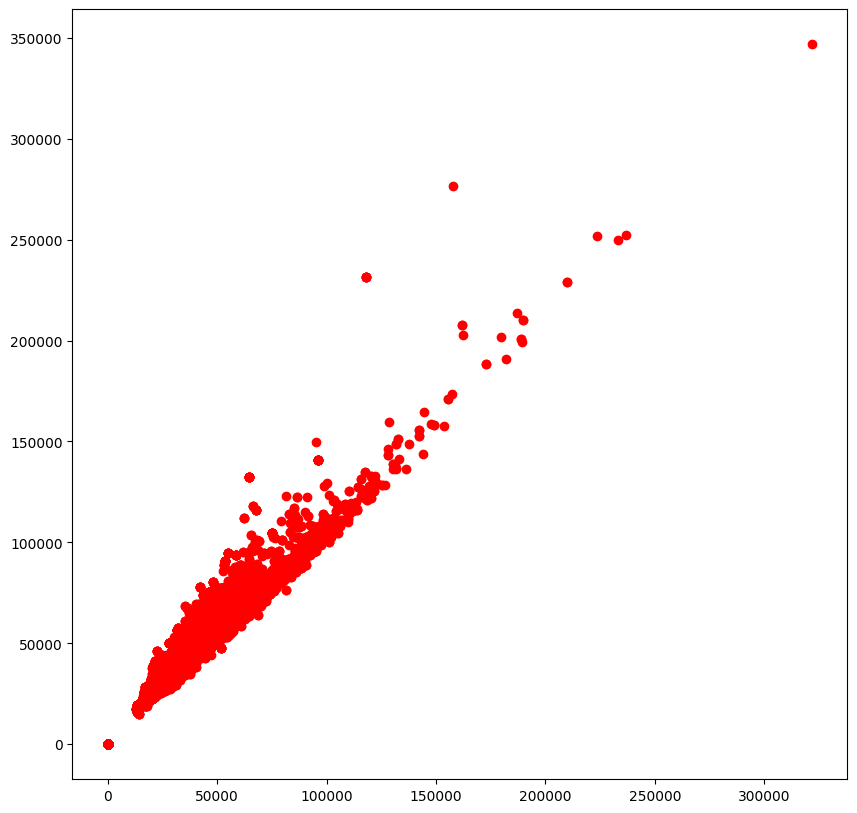

In [7]:
# Applying a scatter plot on the chosen attributes
plt.figure(figsize=(10, 10))
plt.scatter(attribute1, attribute2, color='red')
plt.show()

In [8]:
# Question A2:
# Creating a linear regression model on the given data
from sklearn import linear_model
from sklearn.model_selection import train_test_split
attribute_independent = pd.DataFrame(attribute1) # Making the independent attribute
attribute_dependent = pd.DataFrame(attribute2) # Making the dependent attribute

# Splitting the data into training data and testing data
attribute_independent_train, attribute_independent_test, attribute_dependent_train, attribute_dependent_test = train_test_split(attribute_independent, attribute_dependent, test_size = 0.3, random_state = 42)
regressor = linear_model.LinearRegression()
# Fitting the training data into the model
regressor.fit(attribute_independent_train, attribute_dependent_train)
# Predicting the values using the input test data
attribute_dependent_pred_lin_reg = regressor.predict(attribute_independent_test)

In [9]:
# Calculating the given model mean square error
from sklearn.metrics import mean_squared_error
mean_square_error_attribute_lin_reg = mean_squared_error(attribute_dependent_test, attribute_dependent_pred_lin_reg)
print("The mean square error of the given dataset is: ", mean_square_error_attribute_lin_reg)

The mean square error of the given dataset is:  63610176.68039484


In [10]:
# Question A3:
# Study all parameters and attributes associated with linear regression model
theta1 = np.sum((attribute_independent - attribute_independent.mean()) * (attribute_independent - attribute_independent.mean())) / np.sum((attribute_independent - attribute_independent.mean()) ** 2)
print("The intercept of the regression line is: ", regressor.intercept_)
print("The slope of the regression line is: ", theta1)

The intercept of the regression line is:  [6328.24996936]
The slope of the regression line is:  Theta0_Lambda0_MeanAmplitude    1.0
dtype: float64


In [13]:
# Question A4:
# Applying logistic regression on our project dataset
dataframe_project_input = dataframe_project.loc[dataframe_project['Label'] == 3452 or 3453, dataframe_project.columns[2:]]
dataframe_project_output = dataframe_project.loc[dataframe_project['Label']!=1, dataframe_project.columns[1]]

dataframe_input_train, dataframe_input_test, dataframe_output_train, dataframe_output_test = train_test_split(dataframe_project_input, dataframe_project_output, test_size=0.3, random_state=42)
logistic_reg = linear_model.LogisticRegression()

# Fitting the training data into the model
logistic_reg.fit(dataframe_input_train, dataframe_output_train)

# Predicting the values using the input test data
attribute_dependent_pred_log_reg = logistic_reg.predict(dataframe_input_test)

ValueError: ignored

In [14]:
# Comparing the accuracy of the logistic regression
mean_square_error_log_reg = mean_squared_error(dataframe_output_test, attribute_dependent_pred_log_reg)
print("The mean square error of the given dataset for Logistic Regression is: ", mean_square_error_log_reg)

NameError: ignored

In [15]:
# Question A5:
# Use a Regression Tree and k-NN regressor on the dataset
# Regression Tree Model
from sklearn import tree
regr_tree = tree.DecisionTreeRegressor()

# Fitting the training data into the model
regr_tree.fit(dataframe_input_train, dataframe_output_train)

# Predicting the values using the input test data
attribute_dependent_pred_reg_tree = logistic_reg.predict(dataframe_input_test)

NameError: ignored

In [16]:
# k-NN Regressor model
from sklearn import neighbors
knn_regr = neighbors.KNeighborsRegressor()

# Fitting the training data into the model
knn_regr.fit(dataframe_input_train, dataframe_output_train)

# Predicting the values using the input test data
attribute_dependent_pred_knn_regr = knn_regr.predict(dataframe_input_test)

NameError: ignored

In [17]:
# Giving the accuracy of the models
mean_square_error_reg_tree = mean_squared_error(dataframe_output_test, attribute_dependent_pred_reg_tree)
print("The mean square error of the given dataset for Decision Tree Regressor is: ", mean_square_error_reg_tree)

mean_square_error_knn_regr = mean_squared_error(dataframe_output_test, attribute_dependent_pred_knn_regr)
print("The mean square error of the given dataset for k-NN Regressor is: ", mean_square_error_knn_regr)

NameError: ignored